# Importing Libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


### Finding all types of missing values and importing the dataset

In [2]:
missing_values=["n/a","na","--"," "]
df=pd.read_csv(r"C:\Users\PARAS\Downloads\data\train.csv",na_values= missing_values)

**Look at top 5**

In [3]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,NaN,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,NaN,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


check the various attributes of data like shape(row and column), Columns, datatypes

In [4]:
df.shape

(150000, 9)

In [5]:
df.columns.values

array(['ID', 'STATE', 'AGE', 'OCCUPATION', 'INCOME_GROUP',
       'CUSTOMER_SINCE', 'LOYALTY_PROGRAM', 'PAST_PURCHASE', 'PURCHASE'],
      dtype=object)

In [6]:
#Check the data types of all the columns
df.dtypes

ID                  int64
STATE              object
AGE                 int64
OCCUPATION         object
INCOME_GROUP       object
CUSTOMER_SINCE      int64
LOYALTY_PROGRAM    object
PAST_PURCHASE       int64
PURCHASE           object
dtype: object

### checking our dependent variable 

In [7]:
df['PURCHASE'].value_counts()

No     114537
Yes     35463
Name: PURCHASE, dtype: int64

In [8]:
100*df['PURCHASE'].value_counts()/len(df['PURCHASE'])

No     76.358
Yes    23.642
Name: PURCHASE, dtype: float64

1)Data is imbalanced, ratio = 76:27

2)So we analyse the data with other features while taking the target values separately to get some insights.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               150000 non-null  int64 
 1   STATE            148158 non-null  object
 2   AGE              150000 non-null  int64 
 3   OCCUPATION       107223 non-null  object
 4   INCOME_GROUP     146563 non-null  object
 5   CUSTOMER_SINCE   150000 non-null  int64 
 6   LOYALTY_PROGRAM  132176 non-null  object
 7   PAST_PURCHASE    150000 non-null  int64 
 8   PURCHASE         150000 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


# Checking Missing Value

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


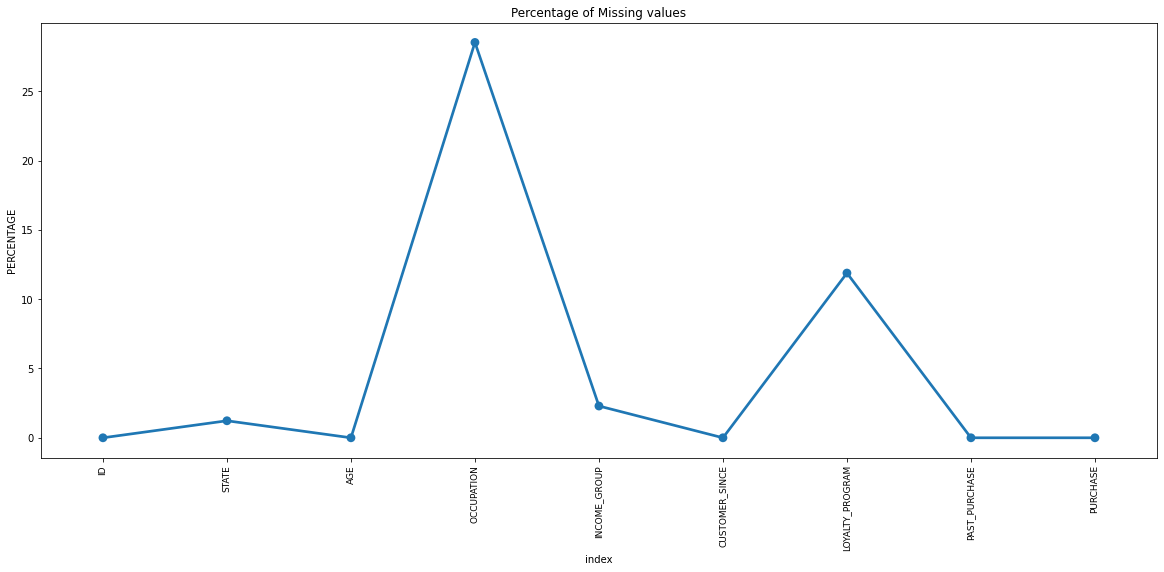

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(20,8))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =9)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
df.isnull().sum()

ID                     0
STATE               1842
AGE                    0
OCCUPATION         42777
INCOME_GROUP        3437
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

There are many missing values in the folders STATE, OCCUPATION,INCOME_GROUP and LOYALTY_PROGRAM

In [12]:
df['OCCUPATION'] = df['OCCUPATION'].fillna('Others')

In [13]:
df['OCCUPATION'].value_counts()

Self employed    61375
Salaried         44214
Others           42777
Business          1634
Name: OCCUPATION, dtype: int64

In [14]:
df['LOYALTY_PROGRAM'].value_counts()
df['LOYALTY_PROGRAM'] = df['LOYALTY_PROGRAM'].fillna('No_Response')

In [15]:
df['LOYALTY_PROGRAM'].value_counts()

No             88182
Yes            43994
No_Response    17824
Name: LOYALTY_PROGRAM, dtype: int64

In [16]:
df['INCOME_GROUP'].value_counts()
df['INCOME_GROUP'] = df['INCOME_GROUP'].fillna('Others')

In [17]:
df['INCOME_GROUP'].value_counts()

Low       63523
High      41808
Medium    41232
Others     3437
Name: INCOME_GROUP, dtype: int64

In [18]:
df['STATE'].value_counts()
df['STATE']=df['STATE'].fillna('Others')

In [19]:
df['STATE'].value_counts()

Maharashtra                    21968
Tamil Nadu                     17836
Uttar Pradesh                  16400
Karnataka                      11689
Gujarat                         7864
West Bengal                     7751
Telangana                       4783
Andhra Pradesh                  4781
Rajasthan                       4621
Kerala                          3718
Madhya Pradesh                  3680
Delhi                           3572
Bihar                           3225
Haryana                         3197
Punjab                          3113
Odisha                          2773
Assam                           2638
Chhattisgarh                    2366
Jharkhand                       2242
Uttarakhand                     1984
Jammu and Kashmir               1962
Others                          1842
Himachal Pradesh                1763
Goa                             1735
Tripura                         1735
Chandigarh                      1583
Puducherry                      1503
M

#  UNIVARIENT ANALYSIS

In [20]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,Others,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,Others,High,2013,No_Response,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [21]:
df['STATE'].value_counts()

Maharashtra                    21968
Tamil Nadu                     17836
Uttar Pradesh                  16400
Karnataka                      11689
Gujarat                         7864
West Bengal                     7751
Telangana                       4783
Andhra Pradesh                  4781
Rajasthan                       4621
Kerala                          3718
Madhya Pradesh                  3680
Delhi                           3572
Bihar                           3225
Haryana                         3197
Punjab                          3113
Odisha                          2773
Assam                           2638
Chhattisgarh                    2366
Jharkhand                       2242
Uttarakhand                     1984
Jammu and Kashmir               1962
Others                          1842
Himachal Pradesh                1763
Goa                             1735
Tripura                         1735
Chandigarh                      1583
Puducherry                      1503
M

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Madhya Pradesh'),
  Text(2, 0, 'West Bengal'),
  Text(3, 0, 'Tamil Nadu'),
  Text(4, 0, 'Maharashtra'),
  Text(5, 0, 'Kerala'),
  Text(6, 0, 'Goa'),
  Text(7, 0, 'Karnataka'),
  Text(8, 0, 'Andhra Pradesh'),
  Text(9, 0, 'Telangana'),
  Text(10, 0, 'Chandigarh'),
  Text(11, 0, 'Nagaland'),
  Text(12, 0, 'Andaman and Nicobar Islands'),
  Text(13, 0, 'Tripura'),
  Text(14, 0, 'Delhi'),
  Text(15, 0, 'Himachal Pradesh'),
  Text(16, 0, 'Others'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Sikkim'),
  Text(19, 0, 'Gujarat'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Bihar'),
  Text(22, 0, 'Punjab'),
  Text(23, 0, 'Arunachal Pradesh'),
  Text(24, 0, 'Haryana'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Uttarakhand'),
  Text(27, 0, 'Jammu and Kashmir'),
  Text(28, 0, 'Assam'),
  Text(29, 0, 'Manip

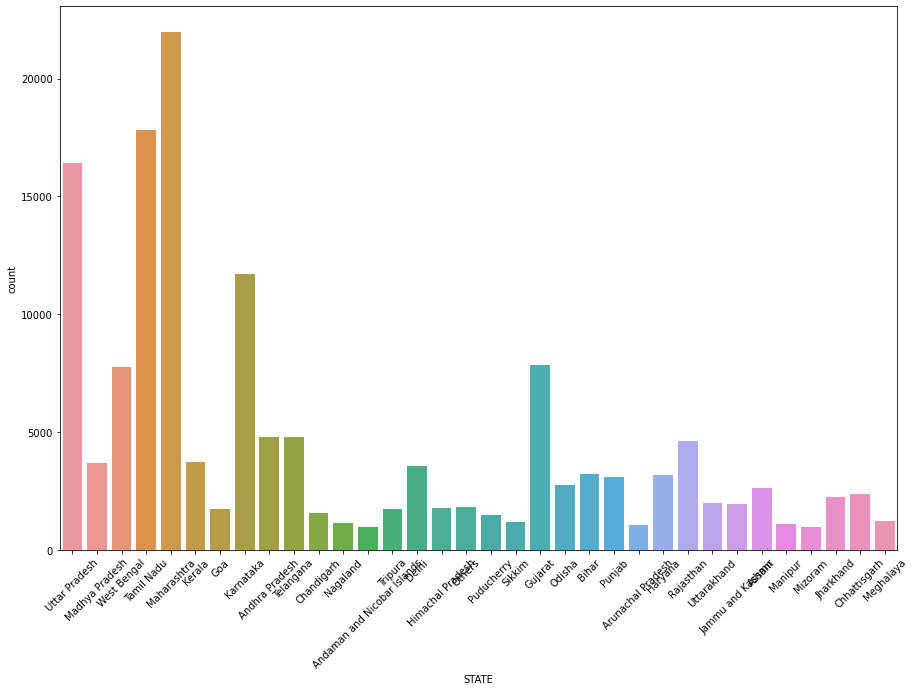

In [22]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='STATE',data=df)
plt.xticks(rotation=45)

**From above dataframe we can clearly observe that we have maximum customers from Maharastra**

In [23]:
df['AGE'].value_counts()

28    8985
29    8095
27    7927
30    6874
26    5533
      ... 
82     450
83     408
84     397
85     368
23       1
Name: AGE, Length: 63, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='count'>

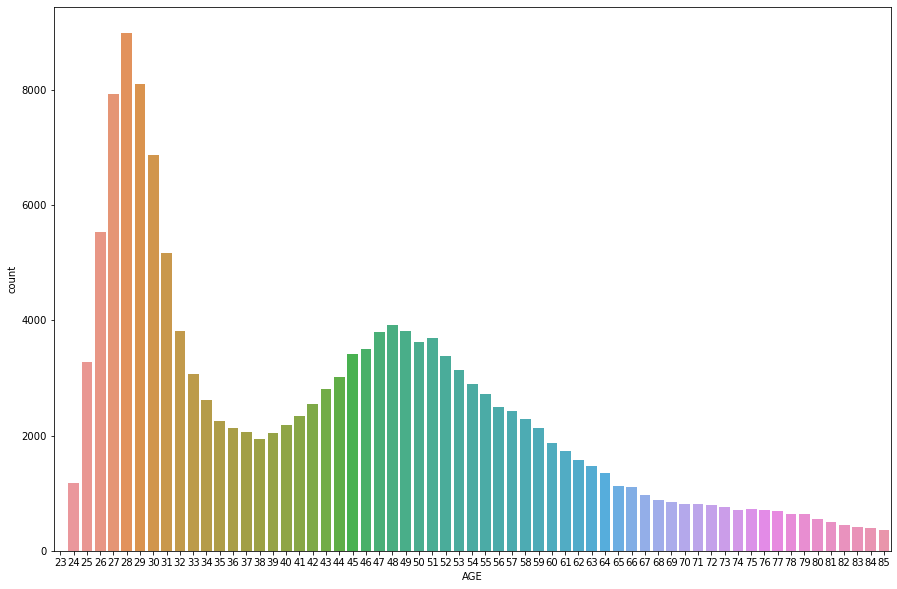

In [24]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='AGE',data=df)

**we conclude that youngsters are more interested in buying the product (27,28,29,30)**

In [25]:
df['OCCUPATION'].value_counts()

Self employed    61375
Salaried         44214
Others           42777
Business          1634
Name: OCCUPATION, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Salaried'),
  Text(2, 0, 'Self employed'),
  Text(3, 0, 'Business')])

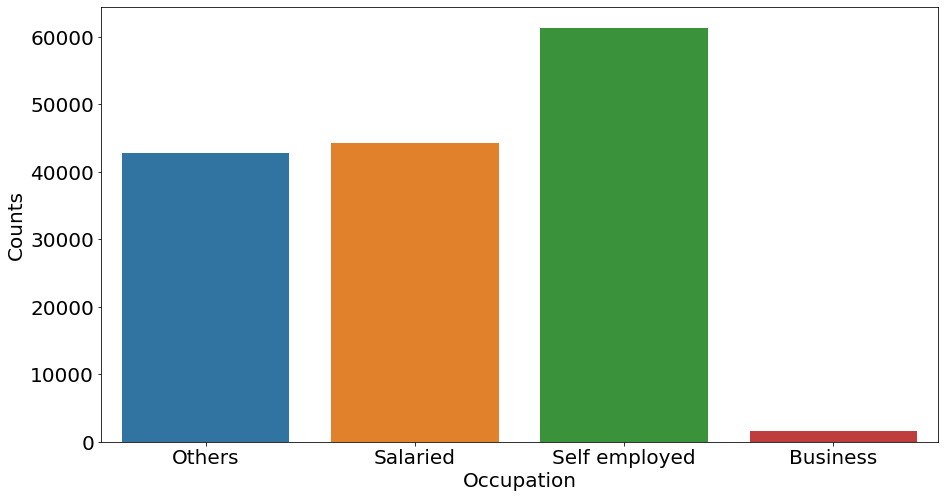

In [26]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.countplot(x='OCCUPATION',data=df)
b.set_xlabel("Occupation",fontsize=20)
b.set_ylabel("Counts",fontsize=20)
b.tick_params(labelsize=5)
#to increase y ticks size
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)


**Most of the buyers are Self employed**

In [27]:
df['INCOME_GROUP'].value_counts()

Low       63523
High      41808
Medium    41232
Others     3437
Name: INCOME_GROUP, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'Others')])

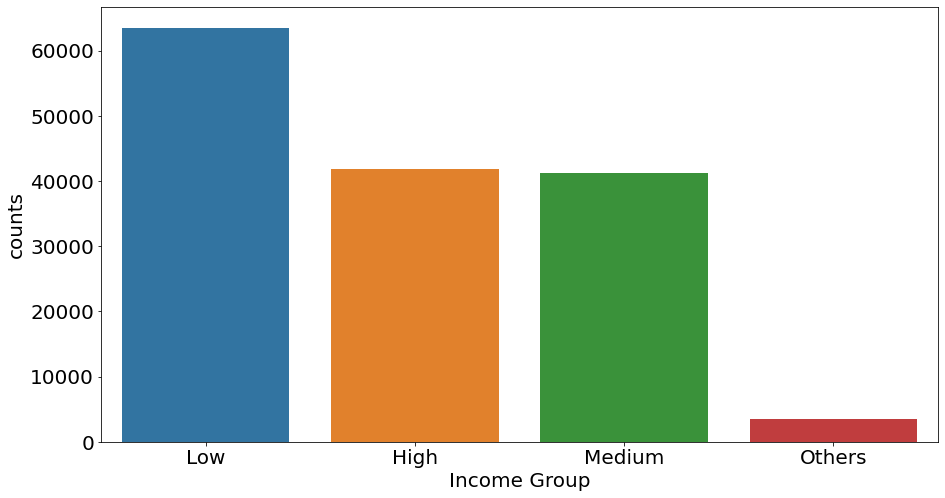

In [28]:
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.countplot(x='INCOME_GROUP',data=df)
b.set_xlabel("Income Group",fontsize=20)
b.set_ylabel("counts",fontsize=20)
b.tick_params(labelsize=5)
#to increase y ticks size
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)


## Interesting Fact 
**Low Salary customers are our higher buyers**

In [29]:
df['CUSTOMER_SINCE'].value_counts()

2018    44924
2017    37693
2012    12757
2014    10406
2015     9880
2013     9160
2011     8260
2016     7149
2010     5854
2009     2710
2019     1173
2008       34
Name: CUSTOMER_SINCE, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019')])

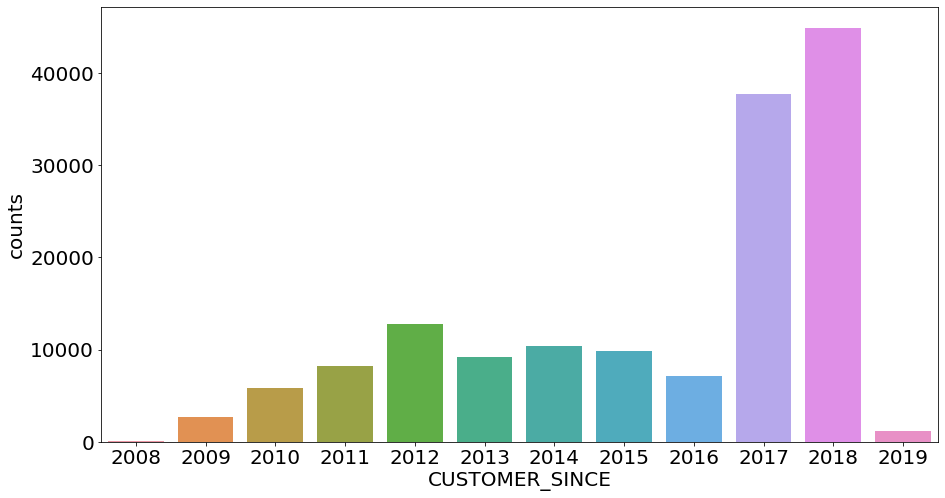

In [30]:
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.countplot(x='CUSTOMER_SINCE',data=df)
b.set_xlabel("CUSTOMER_SINCE",fontsize=20)
b.set_ylabel("counts",fontsize=20)
b.tick_params(labelsize=5)
#to increase y ticks size
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)


**There is a sudden downfall in customers 2019 bar and customers increased very much between 2017 to 2018**

In [31]:
df['LOYALTY_PROGRAM'].value_counts()

No             88182
Yes            43994
No_Response    17824
Name: LOYALTY_PROGRAM, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'No_Response'), Text(2, 0, 'Yes')])

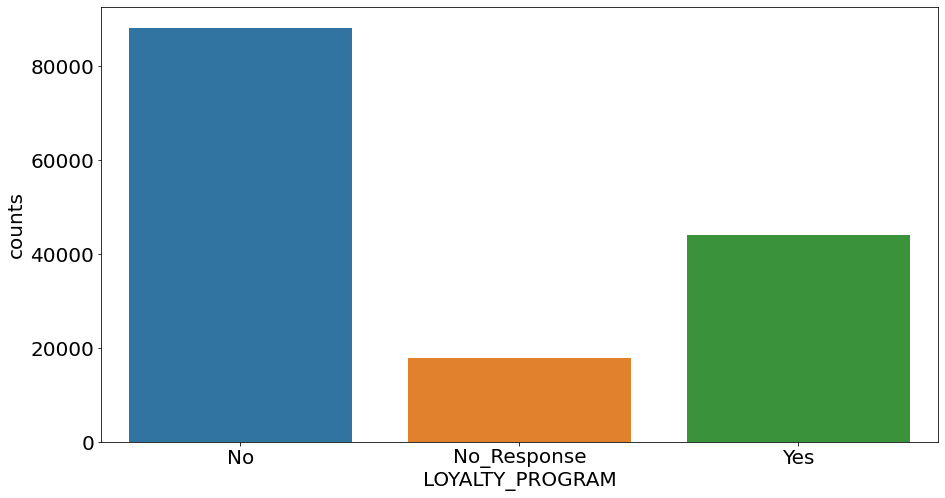

In [32]:
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.countplot(x='LOYALTY_PROGRAM',data=df)
b.set_xlabel("LOYALTY_PROGRAM",fontsize=20)
b.set_ylabel("counts",fontsize=20)
b.tick_params(labelsize=5)
#to increase y ticks size
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)


**Most of the customers are not interested in the company's loyalty program**

In [33]:
print("Minimum purchase =",min(df['PAST_PURCHASE']))
print("Maximum purchase =",max(df['PAST_PURCHASE']))

Minimum purchase = 208
Maximum purchase = 103520


# BIVARIENT ANALYSIS

In [34]:
#!pip install pandas_profiling

In [35]:
from pandas_profiling import ProfileReport

In [36]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [37]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

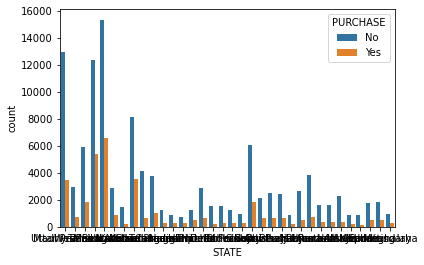

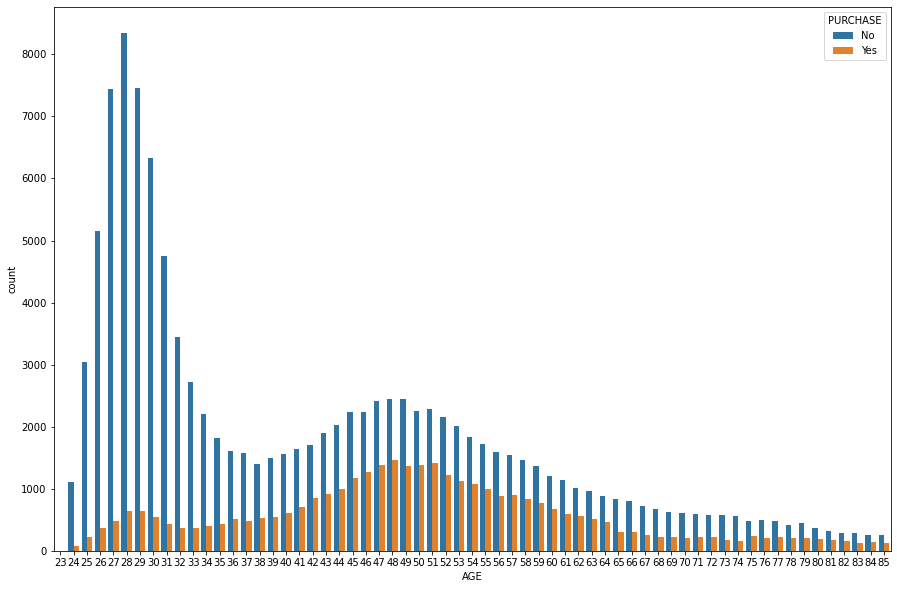

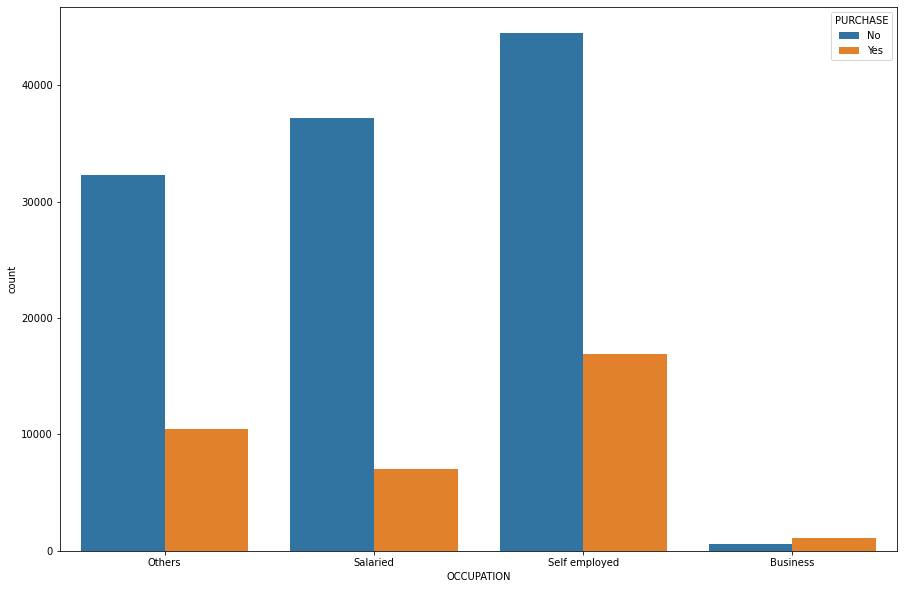

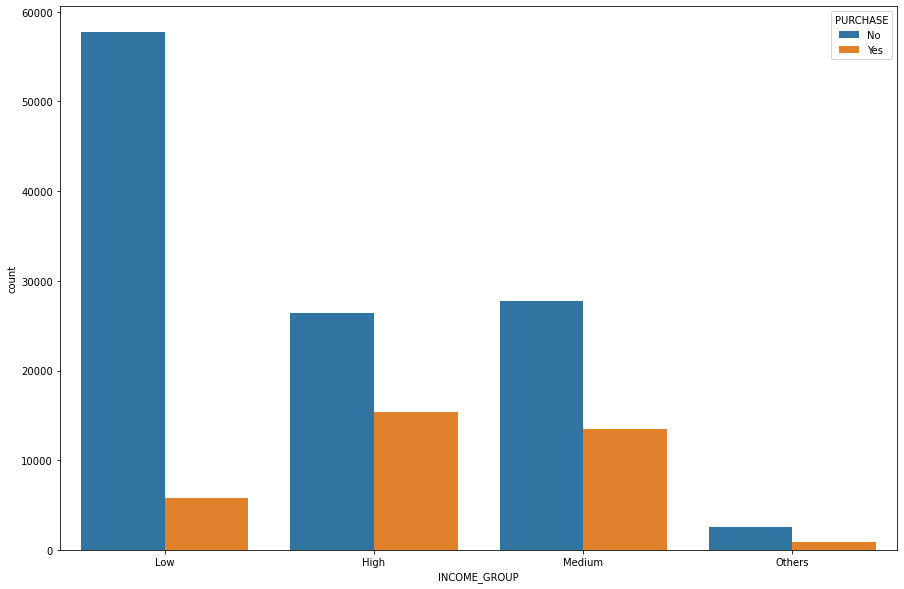

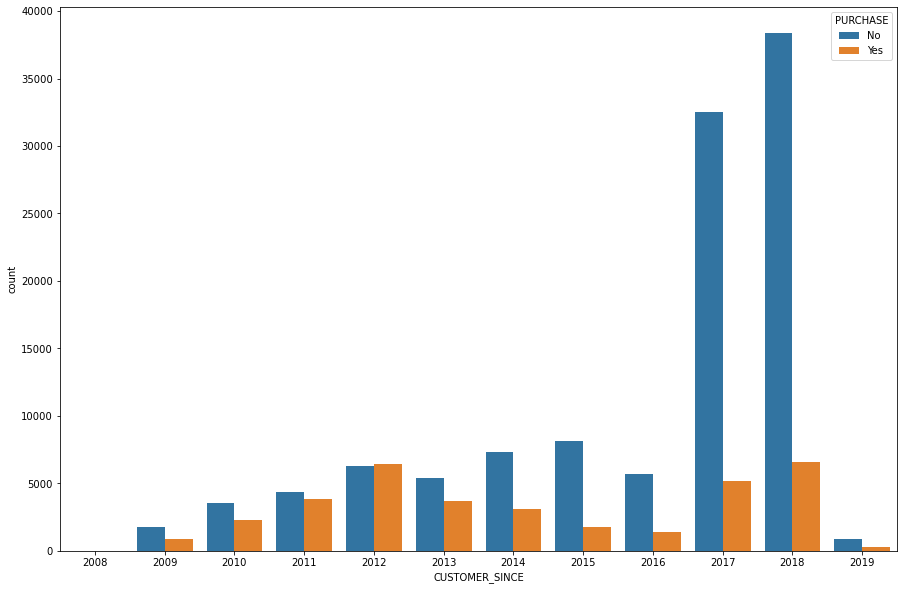

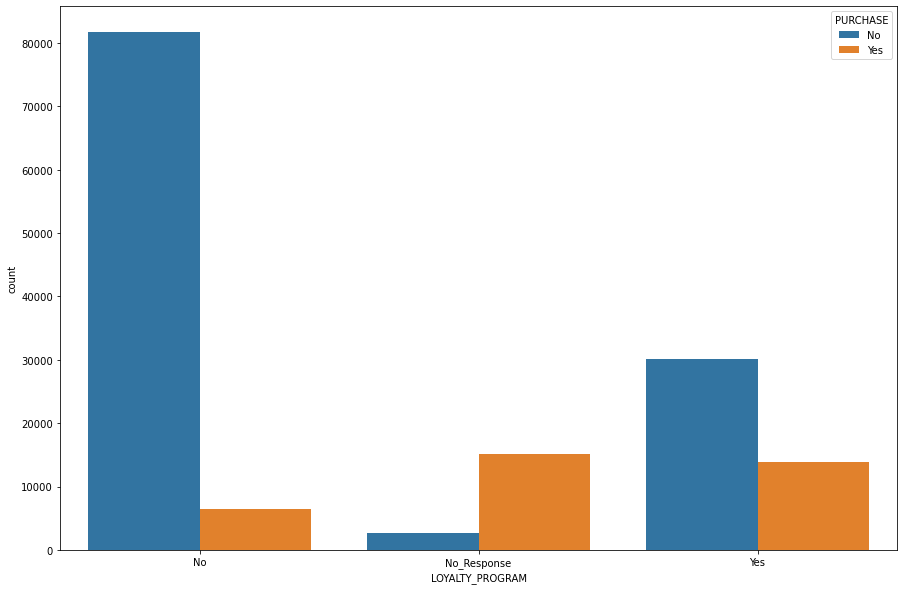

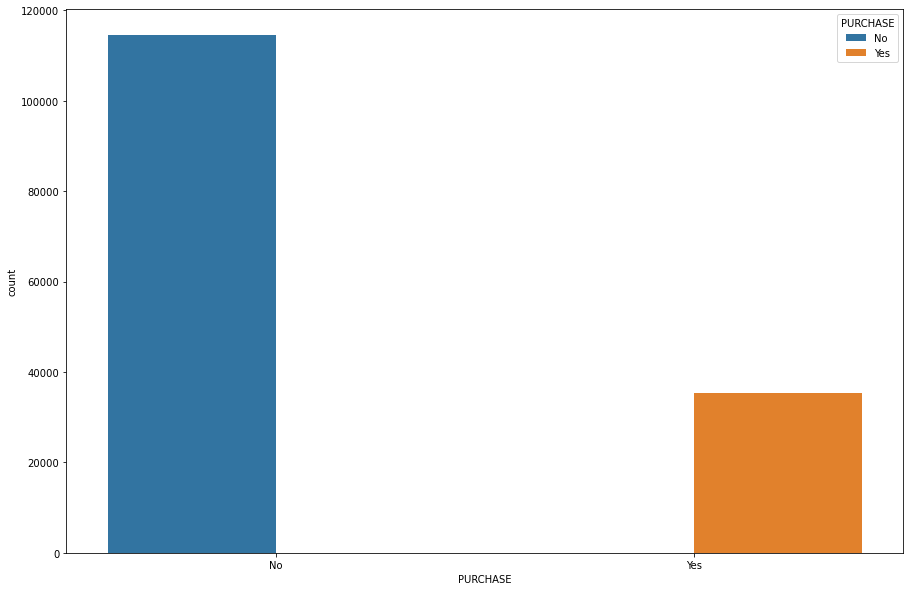

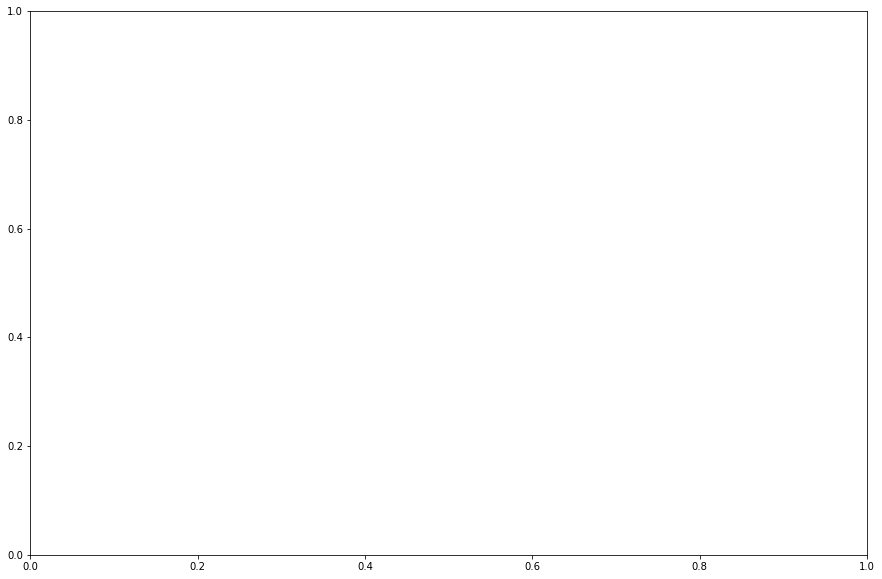

In [106]:
#fig_dims = (15, 10)
#fig, ax = plt.subplots(figsize=(15,10))
for i, predictor in enumerate(df.drop(columns=['ID','PAST_PURCHASE'])):

    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='PURCHASE')
    fig, ax = plt.subplots(figsize=(15,10))

### correlation

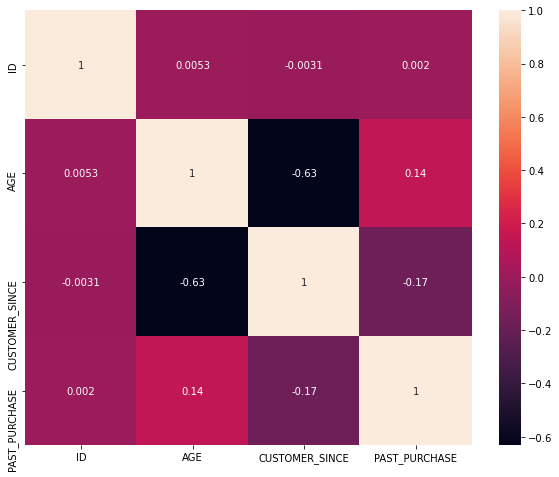

In [38]:
plt.figure(figsize=(10, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

**There is high negative correlation between AGE and CUSTOMER_SINCE**

In [39]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,Others,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,Others,High,2013,No_Response,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


**From the above reports following insights can be observed**

1. It doesn't matters if in any particular state the number of customers are high, so the number of customers for purchasing from the store will also be high.
2. Similarly for age group, although the customers are more from age group 25-33 but the ratio of customers who are already our customers and will again purchase our product is high between age group of 40-60(these are our loyal customers)
3. If we take a look at "Occupation" we can see the number of customers are high in self employed category and also maintains a good ratio of being our loyal customers.
4. Number of customers are maximum in 2017&2018 but surprisingly the customers who are with company since 2012 are most loyal customers of the company.
5. Customers who are taking the loyalty program and also who all not responded are also the loyal customers of the company who will make a purchase from the company.

# Data Preprocessing

In [40]:
df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,.9,.95,.99])

,ID,AGE,CUSTOMER_SINCE,PAST_PURCHASE
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,43.805660,2015.507960,11244.207287
std,43301.414527,14.828219,2.685645,8458.166886
min,1.000000,23.000000,2008.000000,208.000000
1%,1500.990000,25.000000,2009.000000,2337.000000
10%,15000.900000,27.000000,2011.000000,4317.000000
25%,37500.750000,30.000000,2013.000000,6034.750000
50%,75000.500000,43.000000,2017.000000,8926.000000
75%,112500.250000,54.000000,2018.000000,13636.000000
90%,135000.100000,64.000000,2018.000000,20398.000000


In [41]:
df_dummies= pd.get_dummies(data=df, columns=['OCCUPATION','LOYALTY_PROGRAM', 'INCOME_GROUP'])

In [44]:
df_dummies

,ID,STATE,AGE,CUSTOMER_SINCE,PAST_PURCHASE,PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,1,Uttar Pradesh,28,2018,4937,No,0,1,0,0,1,0,0,0,1,0,0
1,2,Madhya Pradesh,27,2018,10834,No,0,0,1,0,1,0,0,0,1,0,0
2,3,West Bengal,62,2013,8610,Yes,0,1,0,0,0,1,0,1,0,0,0
3,4,Tamil Nadu,27,2018,14374,Yes,0,0,1,0,1,0,0,0,1,0,0
4,5,Uttar Pradesh,40,2015,13158,No,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,Assam,29,2017,6241,No,0,0,1,0,1,0,0,0,1,0,0
149996,149997,Andhra Pradesh,53,2010,29447,No,0,0,0,1,1,0,0,0,0,1,0
149997,149998,Odisha,31,2018,4856,No,0,1,0,0,1,0,0,0,1,0,0
149998,149999,Andhra Pradesh,54,2010,10031,Yes,0,0,0,1,0,0,1,1,0,0,0


In [45]:
df_dummies

,ID,STATE,AGE,CUSTOMER_SINCE,PAST_PURCHASE,PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,1,Uttar Pradesh,28,2018,4937,No,0,1,0,0,1,0,0,0,1,0,0
1,2,Madhya Pradesh,27,2018,10834,No,0,0,1,0,1,0,0,0,1,0,0
2,3,West Bengal,62,2013,8610,Yes,0,1,0,0,0,1,0,1,0,0,0
3,4,Tamil Nadu,27,2018,14374,Yes,0,0,1,0,1,0,0,0,1,0,0
4,5,Uttar Pradesh,40,2015,13158,No,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,Assam,29,2017,6241,No,0,0,1,0,1,0,0,0,1,0,0
149996,149997,Andhra Pradesh,53,2010,29447,No,0,0,0,1,1,0,0,0,0,1,0
149997,149998,Odisha,31,2018,4856,No,0,1,0,0,1,0,0,0,1,0,0
149998,149999,Andhra Pradesh,54,2010,10031,Yes,0,0,0,1,0,0,1,1,0,0,0


In [46]:
df_dummies.dtypes

ID                              int64
STATE                          object
AGE                             int64
CUSTOMER_SINCE                  int64
PAST_PURCHASE                   int64
PURCHASE                       object
OCCUPATION_Business             uint8
OCCUPATION_Others               uint8
OCCUPATION_Salaried             uint8
OCCUPATION_Self employed        uint8
LOYALTY_PROGRAM_No              uint8
LOYALTY_PROGRAM_No_Response     uint8
LOYALTY_PROGRAM_Yes             uint8
INCOME_GROUP_High               uint8
INCOME_GROUP_Low                uint8
INCOME_GROUP_Medium             uint8
INCOME_GROUP_Others             uint8
dtype: object

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import numpy as np


In [48]:
df_dummies.drop(columns=['ID','STATE'], axis=1, inplace=True)
df_dummies

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,28,2018,4937,No,0,1,0,0,1,0,0,0,1,0,0
1,27,2018,10834,No,0,0,1,0,1,0,0,0,1,0,0
2,62,2013,8610,Yes,0,1,0,0,0,1,0,1,0,0,0
3,27,2018,14374,Yes,0,0,1,0,1,0,0,0,1,0,0
4,40,2015,13158,No,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,29,2017,6241,No,0,0,1,0,1,0,0,0,1,0,0
149996,53,2010,29447,No,0,0,0,1,1,0,0,0,0,1,0
149997,31,2018,4856,No,0,1,0,0,1,0,0,0,1,0,0
149998,54,2010,10031,Yes,0,0,0,1,0,0,1,1,0,0,0


In [55]:
X=df_dummies.copy()
X

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,28,2018,4937,No,0,1,0,0,1,0,0,0,1,0,0
1,27,2018,10834,No,0,0,1,0,1,0,0,0,1,0,0
2,62,2013,8610,Yes,0,1,0,0,0,1,0,1,0,0,0
3,27,2018,14374,Yes,0,0,1,0,1,0,0,0,1,0,0
4,40,2015,13158,No,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,29,2017,6241,No,0,0,1,0,1,0,0,0,1,0,0
149996,53,2010,29447,No,0,0,0,1,1,0,0,0,0,1,0
149997,31,2018,4856,No,0,1,0,0,1,0,0,0,1,0,0
149998,54,2010,10031,Yes,0,0,0,1,0,0,1,1,0,0,0


In [56]:
X.drop(['PURCHASE'],axis=1,inplace=True)
X

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,28,2018,4937,0,1,0,0,1,0,0,0,1,0,0
1,27,2018,10834,0,0,1,0,1,0,0,0,1,0,0
2,62,2013,8610,0,1,0,0,0,1,0,1,0,0,0
3,27,2018,14374,0,0,1,0,1,0,0,0,1,0,0
4,40,2015,13158,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,29,2017,6241,0,0,1,0,1,0,0,0,1,0,0
149996,53,2010,29447,0,0,0,1,1,0,0,0,0,1,0
149997,31,2018,4856,0,1,0,0,1,0,0,0,1,0,0
149998,54,2010,10031,0,0,0,1,0,0,1,1,0,0,0


In [57]:
Y= df_dummies['PURCHASE']

In [58]:
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np

### Train- Test split

In [59]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

# Model Building

## XG boost

In [60]:
from  xgboost import XGBClassifier

In [61]:
xg= XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train)

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred= xg.predict(x_test)

In [63]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [64]:
#checking accuracy of test dataset
print("testing accuracy is:  ", xg.score(x_test, y_test)*100)

testing accuracy is:   85.89666666666666


In [65]:
from sklearn.metrics import *
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
      

[[22018   856]
 [ 3375  3751]]
0.8589666666666667
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22874
         Yes       0.81      0.53      0.64      7126

    accuracy                           0.86     30000
   macro avg       0.84      0.74      0.78     30000
weighted avg       0.85      0.86      0.85     30000



## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
param_grid={
    'learning_rate' :[1,0.5,0.1,0.01],
    'max_depth' :[3,5,10,20],
    'n_estimators' :[10,50,100,200]
}

In [68]:
grid = RandomizedSearchCV(XGBClassifier(objectivee='binary:logistic'), param_grid, verbose=3)

In [69]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=20, n_estimators=200;, score=0.822 total time=  25.6s
[12:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are o

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=20, n_estimators=200;, score=0.821 total time=  22.1s
[12:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was c

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=1, max_depth=20, n_estimators=200;, score=0.823 total time=  23.7s
[12:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=1, max_depth=20, n_estimators=200;, score=0.824 total time=  23.4s
[12:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=1, max_depth=20, n_estimators=200;, score=0.823 total time=  26.4s
[12:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.847 total time=   3.6s
[12:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.847 total time=   3.9s
[12:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.850 total time=   3.7s
[12:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.849 total time=   3.6s
[12:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.848 total time=   3.6s
[12:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=10, n_estimators=200;, score=0.824 total time=  11.7s
[12:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was c

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=1, max_depth=10, n_estimators=200;, score=0.823 total time=  11.4s
[12:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=1, max_depth=10, n_estimators=200;, score=0.827 total time=  11.4s
[12:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=1, max_depth=10, n_estimators=200;, score=0.825 total time=  11.5s
[12:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=1, max_depth=10, n_estimators=200;, score=0.825 total time=  11.3s
[12:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.857 total time=   6.6s
[12:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.856 total time=   6.9s
[12:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.860 total time=   7.0s
[12:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.859 total time=   7.1s
[12:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.858 total time=   6.9s
[12:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.832 total time=  25.3s
[12:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.831 total time=  25.3s
[12:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.835 total time=  24.9s
[12:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:22:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.833 total time=  26.7s
[12:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.832 total time=  25.6s
[12:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.847 total time=  25.7s
[12:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.846 total time=  26.1s
[12:24:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.846 total time=  25.9s
[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.848 total time=  25.4s
[12:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.847 total time=  26.0s
[12:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.857 total time=   0.3s
[12:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.856 total time=   0.5s
[12:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.860 total time=   0.5s
[12:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was c

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.858 total time=   0.4s
[12:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.857 total time=   0.5s
[12:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was c

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.857 total time=   1.5s
[12:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.856 total time=   1.5s
[12:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.859 total time=   1.5s
[12:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.859 total time=   1.5s
[12:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.858 total time=   1.5s
[12:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.846 total time=   1.0s
[12:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.846 total time=   1.0s
[12:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.849 total time=   1.0s
[12:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.847 total time=   1.0s
[12:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.847 total time=   1.0s
[12:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.827 total time=   6.5s
[12:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.824 total time=   6.5s
[12:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.827 total time=   6.6s
[12:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.828 total time=   6.6s
[12:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.828 total time=   6.6s
[12:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectivee" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objectivee='binary:logistic',
                                           random_state=

In [70]:
grid.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}

In [71]:
xg= XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1)
xg.fit(x_train, y_train)

[12:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
# checking accuracy of test dataset
print("testing accuracy is  :", xg.score(x_test, y_test)*100)
print("training accuracy is  :", xg.score(x_train, y_train)*100)

testing accuracy is  : 86.00333333333333
training accuracy is  : 85.975


In [73]:
from sklearn.metrics import *
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
      

[[22018   856]
 [ 3375  3751]]
0.8589666666666667
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22874
         Yes       0.81      0.53      0.64      7126

    accuracy                           0.86     30000
   macro avg       0.84      0.74      0.78     30000
weighted avg       0.85      0.86      0.85     30000



# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=11,
                              metric='euclidean')
model_KNN.fit(x_train,y_train)
y_pred1=model_KNN.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

[[21506  1368]
 [ 6178   948]]
0.7484666666666666
              precision    recall  f1-score   support

          No       0.78      0.94      0.85     22874
         Yes       0.41      0.13      0.20      7126

    accuracy                           0.75     30000
   macro avg       0.59      0.54      0.53     30000
weighted avg       0.69      0.75      0.70     30000



## Decision Tree Classifier

In [76]:
model_dt=DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth=6, min_samples_leaf=8)

In [77]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [78]:
model_dt.score(x_test,y_test)

0.8581666666666666

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22874
         Yes       0.81      0.53      0.64      7126

    accuracy                           0.86     30000
   macro avg       0.84      0.74      0.78     30000
weighted avg       0.85      0.86      0.85     30000



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTE

### USING SMOT

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
oversample = SMOTE()


In [82]:
X1, Y1 = oversample.fit_resample(X, Y)

In [83]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X1, Y1,test_size=0.2)

In [84]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [85]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.87752919349558
              precision    recall  f1-score   support

          No       0.86      0.91      0.88     22995
         Yes       0.90      0.85      0.87     22820

    accuracy                           0.88     45815
   macro avg       0.88      0.88      0.88     45815
weighted avg       0.88      0.88      0.88     45815



## Working on test data

In [86]:
missing_values=["n/a","na","--"," "]
df_test=pd.read_csv(r"C:\Users\PARAS\Downloads\data\test.csv",na_values= missing_values)

In [87]:
df_test.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,150001,Maharashtra,50,Self employed,Medium,2018,No,12746
1,150002,Maharashtra,58,Self employed,High,2011,Yes,12277
2,150003,Andaman and Nicobar Islands,30,Salaried,Low,2017,Yes,16401
3,150004,Mizoram,27,Salaried,Low,2018,Yes,9665
4,150005,Uttar Pradesh,67,NaN,Medium,2014,No,15724


In [88]:
df_test.shape

(50000, 8)

C:\Users\PARAS\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


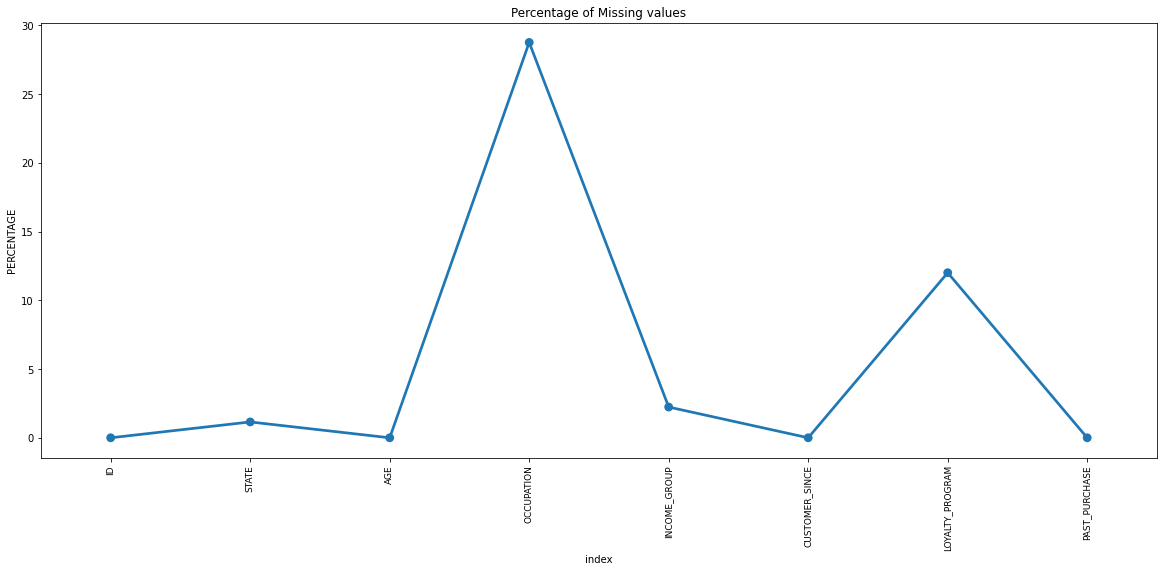

In [89]:
missing = pd.DataFrame((df_test.isnull().sum())*100/df_test.shape[0]).reset_index()
plt.figure(figsize=(20,8))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =9)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [90]:
df_test.isnull().sum()

ID                     0
STATE                576
AGE                    0
OCCUPATION         14380
INCOME_GROUP        1118
CUSTOMER_SINCE         0
LOYALTY_PROGRAM     6004
PAST_PURCHASE          0
dtype: int64

In [91]:
df_test['STATE'].fillna('Others', inplace=True)
df_test['OCCUPATION'].fillna('Others', inplace=True)
df_test['INCOME_GROUP'].fillna('Others', inplace=True)
df_test['LOYALTY_PROGRAM'].fillna('No_Response', inplace=True)
df_test.isnull().sum()

ID                 0
STATE              0
AGE                0
OCCUPATION         0
INCOME_GROUP       0
CUSTOMER_SINCE     0
LOYALTY_PROGRAM    0
PAST_PURCHASE      0
dtype: int64

In [92]:
df_dummies1= pd.get_dummies(data=df_test, columns=['OCCUPATION','LOYALTY_PROGRAM', 'INCOME_GROUP'])

In [93]:
df_dummies1

,ID,STATE,AGE,CUSTOMER_SINCE,PAST_PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,150001,Maharashtra,50,2018,12746,0,0,0,1,1,0,0,0,0,1,0
1,150002,Maharashtra,58,2011,12277,0,0,0,1,0,0,1,1,0,0,0
2,150003,Andaman and Nicobar Islands,30,2017,16401,0,0,1,0,0,0,1,0,1,0,0
3,150004,Mizoram,27,2018,9665,0,0,1,0,0,0,1,0,1,0,0
4,150005,Uttar Pradesh,67,2014,15724,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,199996,Karnataka,49,2016,15751,0,0,0,1,1,0,0,0,0,1,0
49996,199997,Kerala,47,2016,7114,0,0,0,1,0,1,0,1,0,0,0
49997,199998,Maharashtra,63,2011,16022,0,1,0,0,1,0,0,1,0,0,0
49998,199999,Rajasthan,32,2017,6239,0,0,1,0,0,0,1,0,1,0,0


In [94]:
df_dummies1.dtypes

ID                              int64
STATE                          object
AGE                             int64
CUSTOMER_SINCE                  int64
PAST_PURCHASE                   int64
OCCUPATION_Business             uint8
OCCUPATION_Others               uint8
OCCUPATION_Salaried             uint8
OCCUPATION_Self employed        uint8
LOYALTY_PROGRAM_No              uint8
LOYALTY_PROGRAM_No_Response     uint8
LOYALTY_PROGRAM_Yes             uint8
INCOME_GROUP_High               uint8
INCOME_GROUP_Low                uint8
INCOME_GROUP_Medium             uint8
INCOME_GROUP_Others             uint8
dtype: object

In [95]:
df_dummies1.drop(columns=['ID','STATE'], axis=1, inplace=True)

In [96]:
df_dummies1

,AGE,CUSTOMER_SINCE,PAST_PURCHASE,OCCUPATION_Business,OCCUPATION_Others,OCCUPATION_Salaried,OCCUPATION_Self employed,LOYALTY_PROGRAM_No,LOYALTY_PROGRAM_No_Response,LOYALTY_PROGRAM_Yes,INCOME_GROUP_High,INCOME_GROUP_Low,INCOME_GROUP_Medium,INCOME_GROUP_Others
0,50,2018,12746,0,0,0,1,1,0,0,0,0,1,0
1,58,2011,12277,0,0,0,1,0,0,1,1,0,0,0
2,30,2017,16401,0,0,1,0,0,0,1,0,1,0,0
3,27,2018,9665,0,0,1,0,0,0,1,0,1,0,0
4,67,2014,15724,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49,2016,15751,0,0,0,1,1,0,0,0,0,1,0
49996,47,2016,7114,0,0,0,1,0,1,0,1,0,0,0
49997,63,2011,16022,0,1,0,0,1,0,0,1,0,0,0
49998,32,2017,6239,0,0,1,0,0,0,1,0,1,0,0


In [97]:
X_test1=df_dummies1

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
oversample = SMOTE()


In [100]:
X1, Y1 = oversample.fit_resample(X, Y)

In [101]:
xr1_train,xr1_test,yr1_train,yr1_test=train_test_split(X1, Y1,test_size=0.2)

In [102]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [103]:
model_dt_smote.fit(xr1_train,yr1_train)
yr_predict1 = model_dt_smote.predict(X_test1)
print(list(yr_predict1))

['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',

In [108]:
test_result=pd.read_csv(r"C:\Users\PARAS\Downloads\data\final submission.csv")
test_result["PURCHASE"]=yr_predict1
test_result.head()

,ID,PURCHASE
0,150001,No
1,150002,Yes
2,150003,No
3,150004,No
4,150005,No


In [105]:
test_result.PURCHASE.value_counts()

No     38437
Yes    11563
Name: PURCHASE, dtype: int64

In [110]:
test_result.to_csv(r"C:\Users\PARAS\Downloads\data\final submission.csv")